In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar


In [50]:
class BHMF:    
    def __init__(self, n_max):
        self.n_max = n_max
        self.init_local_operators()
        
    def init_local_operators(self):
    #photonic
        self.a = np.diag(np.sqrt(np.arange(self.n_max) + 1), 1)
        self.n = self.a.T @ self.a
        self.I = np.identity(self.n_max + 1)

    def compute_hamiltonian(self, t, mu, z, psi):
        H = -mu * self.n + 0.5 * self.n @ (self.n - self.I) - t * z * psi * (self.a + self.a.T) + t * z * psi ** 2 * self.I
        return H

    def find_psi(self, t, mu, z):
        def E_gs(psi):
            w, _ = np.linalg.eigh(self.compute_hamiltonian(t, mu, z, psi))
            return w[0]

        res = minimize_scalar(E_gs)
        return res.x

In [54]:
model = BHMF(20)

z, size = 6, 150
t = np.linspace(0, 0.05, size)
mu = np.linspace(0, 3, size)

order_param = np.zeros((size, size))

for k1 in range(size):
    for k2 in range(size):
        order_param[k2, k1] = np.abs(model.find_psi(t[k1], mu[k2], z))


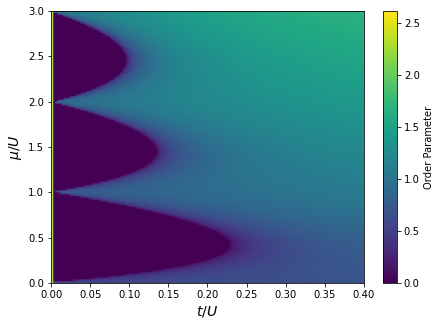

In [53]:
plt.figure(figsize=(7, 5))
plt.imshow(order_param, origin = "lower", extent = [0, 0.4, 0, 3], aspect = "auto")

cb = plt.colorbar()
cb.set_label("Order Parameter", size=10)
cb.ax.tick_params(labelsize=10)

plt.xlabel(r"$t/U$", fontsize=14)
plt.ylabel(r"$\mu/U$", fontsize=14)
plt.tick_params(labelsize = 10)